## Explorando los datos de la tabla de MNIST

In [25]:
import numpy as np
# Nos va a servir para funciones que contengan elementos algebraicos

import pandas as pd

df_train = pd.read_csv("../dataset/fashion-mnist_train.csv")
df_train.shape

(60000, 785)

In [26]:
df_train[:20] #Veamos como son las primeras 20 filas del dataframe

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


### Creo array que en la posicion i tiene asignada la prenda asociada a dicho valor

In [36]:
prendas = np.array(["Remera/Top", "Pantalon", "Pullover", "Vestido", "Saco", "Sandalia", "Camisa", "Zapatilla", "Bolso", "Bota"])


### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [27]:
df_train = df_train[:5000]

In [28]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((5000, 784), (5000, 1))

Supuestamente es un/a Bota


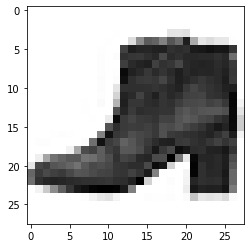

In [41]:
import matplotlib.pyplot as plt

num = 117

print(f"Supuestamente es un/a {prendas[int(y[num])]}")

img = X[num].reshape(28, 28)
plt.imshow(img, cmap="Greys")

### Balance de clases

¿Tenemos la misma cantidad de cada número?

In [30]:
df_train["label"].value_counts(normalize=True)

7    0.1034
3    0.1028
6    0.1016
0    0.1004
4    0.1002
1    0.1000
2    0.0988
9    0.0988
5    0.0978
8    0.0962
Name: label, dtype: float64

#### No, no hay la misma cantidad por cada prenda

### Conjunto de Development

In [31]:
limit = int(0.8 * X.shape[0]) 

X_train, y_train = X[:limit], y[:limit]
X_val, y_val = X[limit:], y[limit:]

assert len(X_train) == len(y_train)
assert len(X_val) == len(y_val)

print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")

Ahora tengo 4000 instancias de entrenamiento y 1000 de validación


### Uso los clasificadores de "Scikit Learn" (kNN, PCA, t-SNE, UMAP)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import umap


# Acá pueden cambiar el clasificador nuestro por el de sklearn!

clf = KNeighborsClassifier(100)

clf.fit(X_train, y_train)

/home/tincho/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=100)

In [33]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_val)

acc = accuracy_score(y_val, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.745
CPU times: user 545 ms, sys: 204 ms, total: 749 ms
Wall time: 224 ms


### Variacion Tamanio de la muestra

In [45]:
def muestra(cant):
    df_train_custom = df_trainBis.sample(cant)
    X_custom = df_train_custom[df_train_custom.columns[1:]].values
    y_custom = df_train_custom["label"].values
    
    return df_train_custom, X_custom, y_custom

### Estudios KFolds

#### K-Folds: kNN

In [46]:
def KFoldKNN(k, X, y):
    kfold = KFold(10)
    accuracyArr = []
    
    for i, fold in kfold.split(X):
        
        X_train = X[i]
        y_train = y[i]
        
        X_test = X[fold]
        y_test = y[fold]
        
        # Metodo kNN
        kNN = KNeighborsClassifier(k)
        
        kNN.fit(X_train, y_train)

        y_pred = kNN.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        accuracyArr.append(acc)
        
    accuracyArr = np.asarray(accuracyArr)
    mediaAccuracy = np.mean(accuracyArr)
    
    return mediaAccuracy

#### K-Folds: PCA (estudio alfa PCA)

In [48]:
def estudio_alfa(a, k, X, y):
    accuracyList = []
    for i in range(1, a):
        # Realizo redimension
        PCA.fit(X)
        X_PCA_train = PCA.transform(X)
        
        # Aplico kNN como siempre
        mediaAccuracy = KFoldKNN(k, X_PCA_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

#### K-Folds: kNN con PCA (estudio vecino con alfa determinado)

In [49]:
def estudio_k_alfa(k, a, X, y):
    accuracyList = []
    PCA.fit(X)
    X_PCA_train = PCA.transform(X)
    for i in range(1, k):
        mediaAccuracy = KFoldKNN(int(i), X_PCA_train, y)
        accuracyList.append(mediaAccuracy)

    accuracyList = np.asarray(accuracyList)
    
    return accuracyList

#### K-Folds: t-SNE

#### K-Folds: UMAP